In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K

from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [1]:
# Versión corregida por mi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow.keras.backend as K

from tqdm.keras import TqdmCallback

In [2]:
df = pd.read_csv('Precio_2017_2020.csv')

In [3]:
df.shape

(955, 2)

In [4]:
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,price
date,
2017-01-02,1145.9
2017-01-03,1151.0
2017-01-04,1164.3
2017-01-05,1176.7
2017-01-06,1175.9


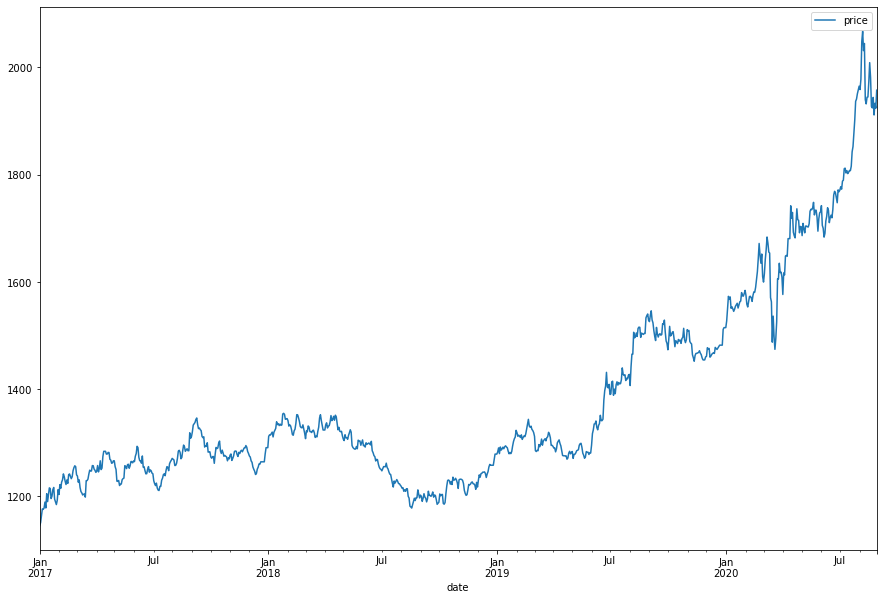

In [5]:
df.plot(figsize=(15,10))

In [6]:
df.describe()

,price
count,955.000000
mean,1379.345445
std,184.347094
min,1145.900000
25%,1255.600000
50%,1303.000000
75%,1484.700000
max,2067.200000


In [7]:
split_date = pd.Timestamp('2020-04-16') 

In [8]:
train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]

In [9]:
print(train.describe())
print(train.head, train.tail)

             price
count   859.000000
mean   1332.142957
std     119.587603
min    1145.900000
25%    1250.600000
50%    1291.300000
75%    1384.100000
max    1741.900000
<bound method NDFrame.head of              price
date              
2017-01-02  1145.9
2017-01-03  1151.0
2017-01-04  1164.3
2017-01-05  1176.7
2017-01-06  1175.9
...            ...
2020-04-10  1680.7
2020-04-13  1680.7
2020-04-14  1741.9
2020-04-15  1718.7
2020-04-16  1729.5

[859 rows x 1 columns]> <bound method NDFrame.tail of              price
date              
2017-01-02  1145.9
2017-01-03  1151.0
2017-01-04  1164.3
2017-01-05  1176.7
2017-01-06  1175.9
...            ...
2020-04-10  1680.7
2020-04-13  1680.7
2020-04-14  1741.9
2020-04-15  1718.7
2020-04-16  1729.5

[859 rows x 1 columns]>


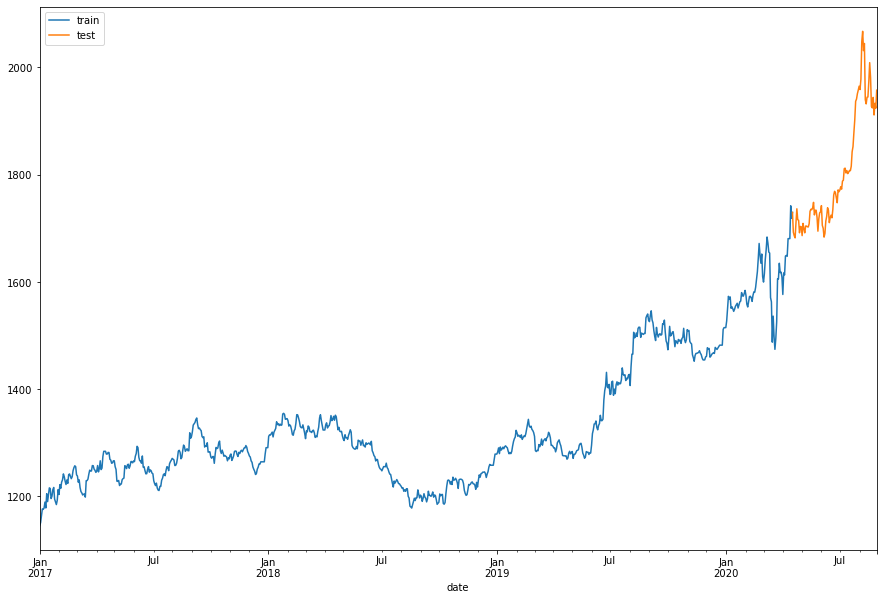

In [10]:
ax = train.plot()
test.plot(ax=ax, figsize=(15,10))
plt.legend(['train', 'test'])

In [11]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [12]:
test_sc[0:6]

array([[0.97919463],
       [0.91728188],
       [0.90654362],
       [0.89966443],
       [0.94748322],
       [0.99060403]])

In [13]:
len(test_sc)

97

In [14]:
train[:4]

,price
date,
2017-01-02,1145.9
2017-01-03,1151.0
2017-01-04,1164.3
2017-01-05,1176.7


In [15]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [16]:
y_train

array([[0.00855705],
       [0.03087248],
       [0.05167785],
       [0.05033557],
       [0.05469799],
       [0.07315436],
       [0.05486577],
       [0.09932886],
       [0.07466443],
       [0.09580537],
       [0.11778523],
       [0.11560403],
       [0.08422819],
       [0.09177852],
       [0.11241611],
       [0.11895973],
       [0.08238255],
       [0.07348993],
       [0.06543624],
       [0.07869128],
       [0.11224832],
       [0.09697987],
       [0.12768456],
       [0.11627517],
       [0.13573826],
       [0.14278523],
       [0.1614094 ],
       [0.15251678],
       [0.13825503],
       [0.12818792],
       [0.14244966],
       [0.13171141],
       [0.15889262],
       [0.16124161],
       [0.1533557 ],
       [0.14647651],
       [0.15234899],
       [0.17114094],
       [0.18087248],
       [0.18674497],
       [0.1840604 ],
       [0.15855705],
       [0.15469799],
       [0.1352349 ],
       [0.14278523],
       [0.11879195],
       [0.10620805],
       [0.101

In [17]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [18]:
X_train_t.shape

(858, 1, 1)

In [19]:
# Modelo original

#K.clear_session()
#model = Sequential()

#model.add(LSTM(40, input_shape=(1, 1)))

#model.add(Dense(1))

#model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
# Mi modelo
K.clear_session()

model = Sequential()

model.add(LSTM(40, input_shape=(1, 1)))

model.add(Dense(1))

#print(model.layers)

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train_t, y_train,
          epochs=20, batch_size=1, verbose=0,
          callbacks=[TqdmCallback(verbose=0)])

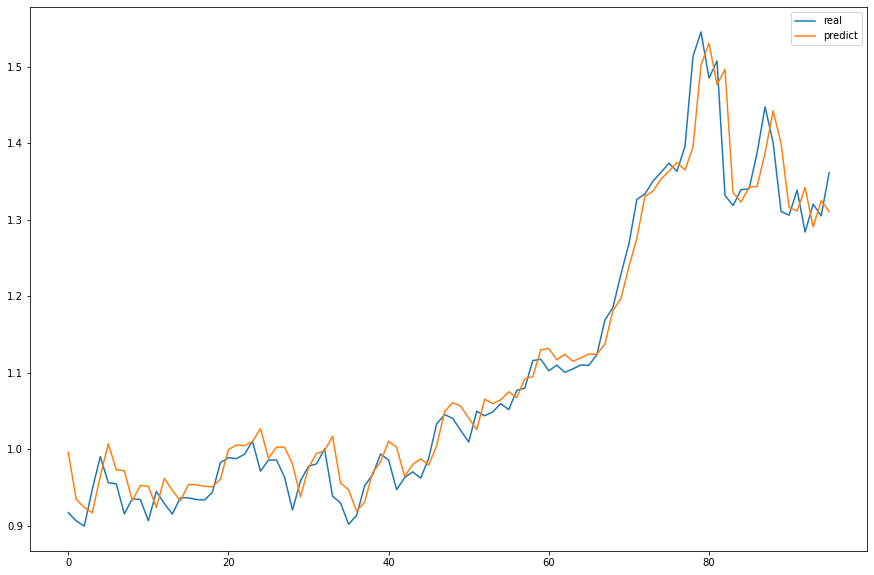

In [22]:
y_pred = model.predict(X_test_t)
plt.figure(figsize=(15, 10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['real', 'predict'])

In [23]:
sc.inverse_transform(y_pred)[-1]

array([1927.1666], dtype=float32)